In [10]:
import tensorflow_estimator
tensorflow_estimator._api

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [4]:
x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [5]:
model1 = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [6]:
model1.compile(
    optimizer=optimizers.rmsprop_v2.RMSProp(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.accuracy]
)

C:\Users\User\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model1.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/4
30/30 [==============================] - 1s 18ms/step - loss: 0.5015 - accuracy: 0.0000e+00 - val_loss: 0.3648 - val_accuracy: 0.0000e+00
Epoch 2/4
30/30 [==============================] - 0s 10ms/step - loss: 0.2924 - accuracy: 0.0000e+00 - val_loss: 0.2949 - val_accuracy: 1.0000e-04
Epoch 3/4
30/30 [==============================] - 0s 10ms/step - loss: 0.2121 - accuracy: 0.0000e+00 - val_loss: 0.2779 - val_accuracy: 1.0000e-04
Epoch 4/4
30/30 [==============================] - 0s 9ms/step - loss: 0.1660 - accuracy: 3.3333e-04 - val_loss: 0.2900 - val_accuracy: 0.0012


In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


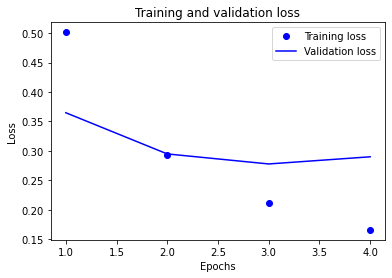

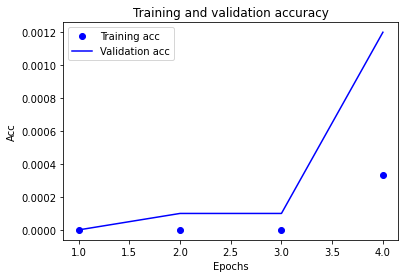

In [9]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

In [10]:
results = model1.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 1s 722us/step - loss: 0.3065 - accuracy: 2.8000e-04
[0.30645307898521423, 0.0002800000074785203]
